# Income qualification project

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [98]:
common_path = r'E:\skills\data_analysis\simplilearn\course_3_machine_learning\Asignments\income_qualification'

In [99]:
# reading test data
train_income_df = pd.read_csv(os.path.join(common_path,
                                           'Dataset/train.csv'))

train_income_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [100]:
#reading test data
test_income_df = pd.read_csv(os.path.join(common_path,
                                           'Dataset/test.csv'))

test_income_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [101]:
train_data = train_income_df.copy()
test_data = test_income_df.copy()

In [102]:
# output variable - which is in the train  but not in the test
output_var = set(train_data.columns) - set(test_data.columns)
print(output_var)

{'Target'}


**Target** is output variable

In [103]:
train_data.info() # check what to do when size is larger

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


**Train data has** <br> - float64(8) <br> int64(130) <br> object(5) <br> - come back to the treatment later

In [105]:
train_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


?? how to avoid ... in the result and see whole result

In [106]:
print("train data shape",train_data.shape)

train data shape (9557, 143)


**Checking number of NA values in train data**

**Train Data:**

In [107]:
print('################# Number of NA values #####################')
print(train_data.isna().sum()[train_data.isna().sum()>0])

print('\n' + '################# Percentage of NA values #####################')

print((train_data.isna().sum()
 [train_data.isna().sum()>0]) * (100 / train_data.shape[0]))

################# Number of NA values #####################
v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

################# Percentage of NA values #####################
v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64


**Test Data:**

In [108]:
print("test data shape",test_data.shape)

test data shape (23856, 142)


In [109]:
print('################# Number of NA values #####################')
print(test_data.isna().sum()[test_data.isna().sum()>0])

print('\n' + '################# Percentage of NA values #####################')

print((test_data.isna().sum()
 [test_data.isna().sum()>0]) * (100 / test_data.shape[0]))

################# Number of NA values #####################
v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

################# Percentage of NA values #####################
v2a1         72.950201
v18q1        75.980885
rez_esc      82.381791
meaneduc      0.129946
SQBmeaned     0.129946
dtype: float64


Dropping the these columns for test data as well

<br> **v2a1, v18q1, rez_esc** can be dropped from the dataframe  

In [110]:
# Droping v2a1, v18q1, rez_esc olumns
print(train_data.shape)
train_data.drop(columns=['v2a1', 'v18q1', 'rez_esc'],inplace=True)
print(train_data.shape)

(9557, 143)
(9557, 140)


In [111]:
# also dropping from the test data set
print(test_data.shape)
test_data.drop(columns=['v2a1', 'v18q1', 'rez_esc'],inplace=True)
print(test_data.shape)

(23856, 142)
(23856, 139)


##### Cheking NA again

###### For train data

*Removing 5 rows where meaneduc and SQBmeaned are NA*

In [112]:
print(train_data.shape)
train_data.dropna(inplace=True)
print(train_data.shape)

(9557, 140)
(9552, 140)


###### For test data

*percentage of NA values in meaneduc and SQBmeaned is 0.12. Hence, removing the rows*  

In [113]:
print(test_data.shape)
test_data.dropna(inplace=True)
print(test_data.shape)

(23856, 139)
(23825, 139)


In [114]:
test_data.isna().sum()[test_data.isna().sum()>0]

Series([], dtype: int64)

### Removing the unncessary columns

###### Removing Id columns

In [115]:
train_data.select_dtypes(include='O').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [116]:
test_data.select_dtypes(include='O').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
5,ID_e77d38d45,8ee7365a8,no,no,11


In [117]:
print(train_data.shape)
train_data.drop(columns=['Id','idhogar'],axis=1,inplace=True)
print(train_data.shape)

(9552, 140)
(9552, 138)


In [118]:
print(test_data.shape)
test_data.drop(columns=['Id','idhogar'],axis=1,inplace=True)
print(test_data.shape)

(23825, 139)
(23825, 137)


## Object variable treatment

In [119]:
train_data.select_dtypes(include='O').head()

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no


### object variable column

In [120]:
print(train_data['dependency'].value_counts())
print('#############################################################')
print(train_data['edjefe'].value_counts())
print('#############################################################')
print(train_data['edjefa'].value_counts())

dependency
yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             373
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: count, dtype: int64
#############################################################
edjefe
no     3761
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       135
16      134
yes     123
10      111
12      111
13      103
21       43
18       19
19       14
20        7
Name: count, dtype: int64
##############################################

Thee are 'yes' and 'no' values in **'dependency, edjefe and edjefa'** column. yes is replaced with 1 and no with 0

In [121]:
replacement_dict = {'yes': 1, 'no': 0}

In [122]:
for df in [train_data, test_data]:
    df['dependency'] = df['dependency'].replace(replacement_dict).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(replacement_dict).astype(int)
    df['edjefa'] = df['edjefa'].replace(replacement_dict).astype(int)


In [123]:
train_data[['dependency', 'edjefe', 'edjefa']].describe()

,dependency,edjefe,edjefa
count,9552.000000,9552.000000,9552.000000
mean,1.145965,5.096106,2.897299
std,1.598744,5.246652,4.612310
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [124]:
test_data[['dependency', 'edjefe', 'edjefa']].describe()

,dependency,edjefe,edjefa
count,23825.000000,23825.000000,23825.000000
mean,1.172455,5.203022,2.796306
std,1.649026,5.201671,4.602284
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [125]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9552 entries, 0 to 9556
Columns: 138 entries, hacdor to Target
dtypes: float64(6), int32(2), int64(130)
memory usage: 10.1 MB


In [126]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23825 entries, 0 to 23855
Columns: 137 entries, hacdor to agesq
dtypes: float64(6), int32(2), int64(129)
memory usage: 24.9 MB


### Check the variance 

In [127]:
var_df = pd.DataFrame(np.var(train_data,0),columns=['var'])
var_df.head()
var_df[var_df['var'] == 0]

,var
elimbasu5,0.0


In [128]:
train_data.drop(columns='elimbasu5',inplace=True)
test_data.drop(columns='elimbasu5',inplace=True)

###### elimbasu5 column variance is 0. Hence, can be droped

### EDA

#### check the 'Target' value correlation for non categorical numeric values

In [132]:
corr_matrix = train_data[non_categorical_cols['Key']].corr()

# Remving target variable row from the correlation dataframe
corr_matrix = corr_matrix.drop('Target',axis=0)
corr_matrix['Target']

rooms              0.226956
r4h1              -0.229732
r4h2               0.101408
r4h3              -0.043146
r4m1              -0.253008
r4m2              -0.036567
r4m3              -0.173588
r4t1              -0.316560
r4t2               0.049281
r4t3              -0.147178
tamhog            -0.147273
tamviv            -0.157865
escolari           0.302267
hhsize            -0.147273
hogar_nin         -0.328359
hogar_adul         0.161166
hogar_mayor       -0.004988
hogar_total       -0.147273
dependency        -0.196910
edjefe             0.243213
edjefa             0.037415
meaneduc           0.335203
bedrooms           0.167291
overcrowding      -0.289053
qmobilephone       0.200010
age                0.117918
SQBescolari        0.296589
SQBage             0.075590
SQBhogar_total    -0.143641
SQBedjefe          0.246396
SQBhogar_nin      -0.311204
SQBovercrowding   -0.258684
SQBdependency     -0.083952
SQBmeaned          0.276620
agesq              0.075590
Name: Target, dtype:

In [133]:
max(corr_matrix['Target'])

0.3352032167717582

### Removing *hogar_* column
Columns with **r4...** provides same information, with better categorization. Hence removing **hogar_nin, hogar_adul, hogar_mayor, hogar_total**

r4t3 and hogar_total are providing esentialy same information i.e., number of individuals in a houshold

In [134]:
print(train_data.shape)

train_data.drop(columns=['hogar_nin',
                        'hogar_adul',
                        'hogar_mayor',
                        'hogar_total'], axis=1, inplace=True)

print(train_data.shape)

print('################################################################################')

print(test_data.shape)

test_data.drop(columns=['hogar_nin',
                        'hogar_adul',
                        'hogar_mayor',
                        'hogar_total'], axis=1, inplace=True)

print(test_data.shape)

(9552, 137)
(9552, 133)
################################################################################
(23825, 137)
(23825, 133)


##### In general there is weak corelation with 

non_categorical_cols.head()

In [225]:
numeric_col = train_data.select_dtypes(include=['number']).columns

dict_numCheck = {} # empty dict

for ii in numeric_col:
    dict_numCheck[ii] = train_data[ii].isin([0,1]).all() 
    # filling dict for numeric column name and True/False 

df_numCheck = pd.DataFrame(list(dict_numCheck.items()), columns=['Key', 'Value'])

df_numCheck.head()

,Key,Value
0,hacdor,True
1,rooms,False
2,hacapo,True
3,v14a,True
4,refrig,True


In [226]:
# selecting only Flase values
non_categorical_cols = df_numCheck[df_numCheck['Value']==False]
non_categorical_cols.head()

,Key,Value
1,rooms,False
6,r4h1,False
7,r4h2,False
8,r4h3,False
9,r4m1,False


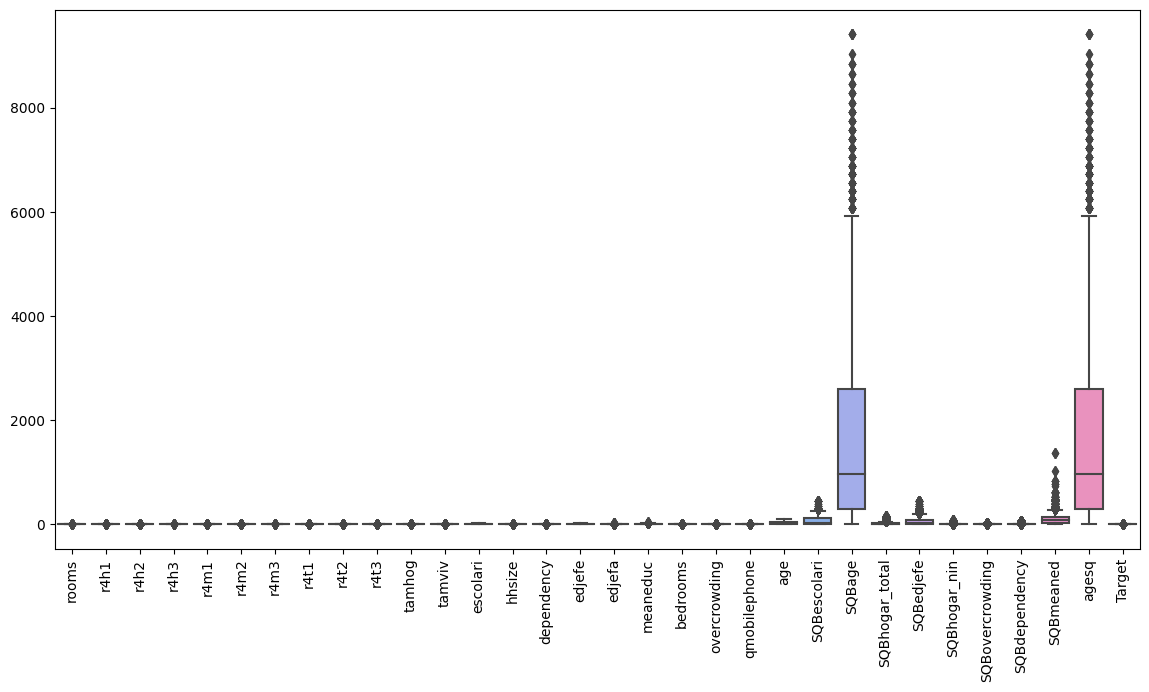

In [227]:
plt.figure(figsize=(14,7))
selected_cols = non_categorical_cols['Key']

sns.boxplot(data=train_data[selected_cols])

plt.xticks(rotation=90)
plt.show()

In [228]:
Q1 = train_data[selected_cols].quantile(0.25)
Q3 = train_data[selected_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers 
outliers = ((train_data[selected_cols] < (Q1 - 1.5 * IQR)) | 
            (train_data[selected_cols] > (Q3 + 1.5 * IQR)))

# number of outliers
outliers_count = outliers.sum()

# percentage of outliers in each column
total_rows = train_data.shape[0]
outliers_percentage = (outliers_count / total_rows) * 100

# Sort the columns based on the percentage of outliers in descending order
columns_with_outliers = outliers_percentage.sort_values(ascending=False)

# Print the columns with the highest percentage of outliers
print("Columns with the highest percentage of outliers:")
print(columns_with_outliers)

Columns with the highest percentage of outliers:
SQBdependency      8.877722
SQBovercrowding    8.438023
dependency         7.935511
Target             7.904104
SQBedjefe          7.370184
SQBhogar_nin       6.731575
r4t1               6.270938
bedrooms           4.208543
r4h2               4.198074
SQBmeaned          4.156198
r4m2               3.967755
SQBhogar_total     3.423367
overcrowding       3.025544
tamviv             2.994137
SQBage             2.868509
agesq              2.868509
SQBescolari        2.523032
hhsize             2.418342
r4t3               2.418342
tamhog             2.418342
edjefa             2.125209
r4m1               1.423786
meaneduc           1.235343
r4t2               1.172529
qmobilephone       1.067839
r4h1               0.952680
rooms              0.523451
r4m3               0.502513
r4h3               0.355946
age                0.000000
edjefe             0.000000
escolari           0.000000
dtype: float64


Maximum percentage of outliers is 8.9 for SQBdependency. Not treating outliers for now to avoid the data loss, as it is below 10%.       

In [223]:
train_income_df['SQBmeaned']

0       100.0000
1       144.0000
2       121.0000
3       121.0000
4       121.0000
          ...   
9552     68.0625
9553     68.0625
9554     68.0625
9555     68.0625
9556     68.0625
Name: SQBmeaned, Length: 9557, dtype: float64

In [139]:
train_income_df.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

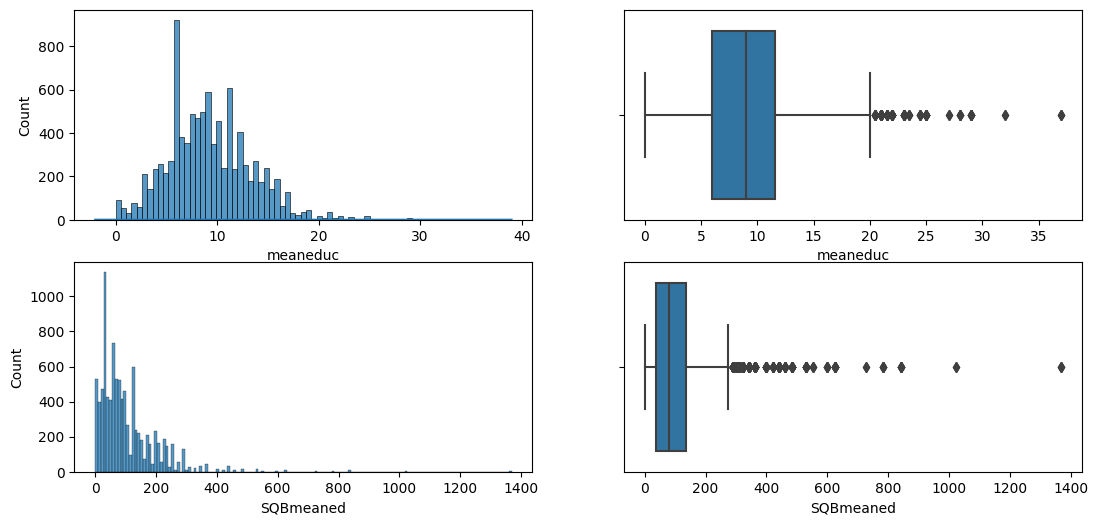

In [140]:
plt.figure(figsize=(13,6))
#plt.hist(train_income_df['meaneduc'],bins=20)
plt.subplot(2,2,1)
sns.histplot(x='meaneduc',data=train_income_df)
sns.kdeplot(x='meaneduc',data=train_income_df)

plt.subplot(2,2,2)
sns.boxplot(x='meaneduc',data=train_income_df)

plt.subplot(2,2,3)
sns.histplot(x='SQBmeaned',data=train_income_df)
plt.subplot(2,2,4)
sns.boxplot(x='SQBmeaned',data=train_income_df)


plt.show()

## Model

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [191]:
Y = train_data['Target']
X_train = train_data.drop(columns='Target',axis=1)

In [192]:
X_test = test_data

In [193]:
X_train.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0,3,0,1,1,0,0,1,1,0,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,0,4,0,1,1,1,0,1,1,0,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,0,8,0,1,1,0,0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,0,5,0,1,1,1,0,2,2,1,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,0,5,0,1,1,1,0,2,2,1,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [194]:
X_test.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0,5,0,1,1,0,1,1,2,0,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,0,5,0,1,1,0,1,1,2,0,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,0,5,0,1,1,0,1,1,2,0,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,0,14,0,1,1,1,0,1,1,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
5,0,3,0,1,1,1,0,0,0,0,...,38,256,1444,4,0,0,1.00,0.00,182.25,1444


In [144]:
# Standardizing data
from sklearn.preprocessing import StandardScaler

In [195]:
X_cols = X_train.columns

In [196]:
SS=StandardScaler()
X_train_data=SS.fit_transform(X_train)
X_train_data=pd.DataFrame(X_train_data,columns=X_cols)

In [197]:
X_test_data=SS.fit_transform(X_test)
X_test_data=pd.DataFrame(X_test_data,columns=X_test.columns)

In [198]:
X_test_data.shape

(23825, 132)

In [199]:
X_train_data.shape

(9552, 132)

In [155]:
# x_train,x_test,y_train,y_test = train_test_split(X_data,Y,test_size=0.25,stratify=Y,random_state=100)

In [170]:
print(x_train.shape)
print(x_test.shape)

(7164, 132)
(2388, 132)


##### Random forest model

In [200]:
rfc = RandomForestClassifier(n_estimators=1000,n_jobs=-1,verbose=True)

In [201]:
rfc.fit(X_train_data,Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    7.8s finished


RandomForestClassifier(n_estimators=1000, n_jobs=-1, verbose=True)

In [202]:
# output variable - which is in the train  but not in the test
set(X_test_data.columns)- set(X_train_data.columns)

set()

In [203]:
# Predicted y
y_predictions = rfc.predict(X_test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    2.1s finished


In [204]:
y_predictions

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

##### Score

In [205]:
print(rfc.score(X_train_data,Y))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.5s


1.0


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.9s finished


In [206]:
print(rfc.score(X_test_data,y_predictions))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.6s


1.0


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    2.1s finished


##### Important features

In [208]:
# feature importance
rfc.feature_importances_

array([2.02808240e-03, 2.10257366e-02, 1.31138989e-03, 6.38029322e-04,
       3.43652568e-03, 1.02128399e-02, 1.08765454e-02, 1.69165847e-02,
       1.60734135e-02, 1.25451734e-02, 1.35103195e-02, 1.64287777e-02,
       1.75473765e-02, 1.68214587e-02, 1.22367953e-02, 1.21386985e-02,
       1.32462647e-02, 1.44124741e-02, 1.22362635e-02, 1.28440674e-02,
       4.99932970e-03, 7.76757333e-03, 6.52791289e-04, 6.11103470e-03,
       7.80505882e-04, 8.14361210e-05, 8.36547518e-05, 1.07049547e-02,
       7.28020517e-03, 6.60512428e-06, 4.90691331e-05, 1.00836466e-03,
       4.33919138e-03, 1.63599002e-03, 1.03519139e-03, 3.31924832e-04,
       1.18849745e-05, 1.58886244e-02, 2.29993598e-03, 2.04416604e-03,
       4.01361259e-04, 4.57928062e-03, 6.82110276e-05, 1.74852493e-04,
       4.61491728e-03, 3.04816818e-04, 5.83119908e-03, 6.07170956e-03,
       1.56946065e-03, 2.88701183e-04, 3.34808697e-04, 8.57708463e-03,
       8.61372767e-03, 4.50590279e-03, 5.21175256e-03, 1.97965155e-03,
      

In [211]:
# Printing top 10 important features
pd.DataFrame({'ftr':X_train_data.columns,
             'imp':rfc.feature_importances_}).sort_values('imp', ascending=False).head(10)

,ftr,imp
130,SQBmeaned,0.052802
93,meaneduc,0.051543
129,SQBdependency,0.032523
90,dependency,0.032101
128,SQBovercrowding,0.026416
104,overcrowding,0.026121
113,qmobilephone,0.025236
127,SQBhogar_nin,0.024496
126,SQBedjefe,0.022816
91,edjefe,0.022615


#### cross-validation

In [213]:
from sklearn.model_selection import cross_val_score

In [217]:
cv_score_test = cross_val_score(rfc,X_test_data,y_predictions,cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 

In [221]:
# Acuracy score
list(cv_score_test)

[0.9053515215110178,
 0.9158447009443862,
 0.9024134312696747,
 0.8507869884575027,
 0.8810073452256033]